In [20]:
import pandas as pd
import numpy as np
from parametros import *
import sys, os
sys.path.append(os.path.join(os.path.dirname(file), "..", ".."))
sys.path.append(os.path.join(os.path.dirname(file), "..", "..", "..", "..", ".."))
from prepro_py import preprocesamiento_naive
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.naive_bayes import CategoricalNB

In [33]:
to_csv = False
return_something = True
feature_selection = False
seek_correlation = None

In [34]:
y_data_style = "seasonal"
x_data, y_data, test = preprocesamiento_naive(
    PAHT_OUTPUT,
    features_keep=features_keep,
    features_drop=features_drop,
    y_data_style=y_data_style,
    features_NA_as_cat=features_NA_as_cat,
    imputation_method=imputation_method,
    n_estimators=n_estimators,
    criterion=criterion,
    feature_selection=feature_selection,
    seek_correlation=seek_correlation,
    to_csv=to_csv,
    return_something=return_something,
    sc_max_depth=sc_max_depth,
    print_cor=print_cor,
    value=1000
    )

In [36]:
x_data.drop("respondent_id", axis=1, inplace=True)

In [37]:
f_selector = SFS(
    CategoricalNB(),
    k_features=x_data.shape[1], 
    forward=True, 
    floating=False, 
    verbose=2,
    scoring='roc_auc',
    cv=5
    )
f_selector.fit(x_data, np.array(y_data).ravel())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:   12.5s finished

[2022-01-11 01:20:23] Features: 1/35 -- score: 0.7140436482268406[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   12.7s finished

[2022-01-11 01:20:35] Features: 2/35 -- score: 0.7751069359362133[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:   12.5s finished

[2022-01-11 01:20:48] Features: 3/35 -- score: 0.8083150522668318[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

SequentialFeatureSelector(estimator=CategoricalNB(), k_features=35,
                          scoring='roc_auc', verbose=2)

In [38]:
values = pd.DataFrame.from_dict(f_selector.get_metric_dict()).T
values

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(19,)","[0.7133359669933391, 0.7111058062344506, 0.720...",0.714044,"(opinion_seas_risk,)",0.004527,0.003522,0.001761
2,"(19, 21)","[0.7718719477887467, 0.7728197132972368, 0.780...",0.775107,"(opinion_seas_risk, age_group)",0.004452,0.003464,0.001732
3,"(10, 19, 21)","[0.8037433885627329, 0.8136815116363408, 0.807...",0.808315,"(doctor_recc_seasonal, opinion_seas_risk, age_...",0.004112,0.0032,0.0016
4,"(10, 18, 19, 21)","[0.8283575468090814, 0.8337626762492456, 0.832...",0.833158,"(doctor_recc_seasonal, opinion_seas_vacc_effec...",0.003759,0.002924,0.001462
5,"(10, 18, 19, 21, 33)","[0.834207722538989, 0.8393027983693842, 0.8379...",0.839004,"(doctor_recc_seasonal, opinion_seas_vacc_effec...",0.003804,0.00296,0.00148
6,"(10, 14, 18, 19, 21, 33)","[0.8382127870530964, 0.8427365558346485, 0.841...",0.843127,"(doctor_recc_seasonal, health_insurance, opini...",0.0041,0.00319,0.001595
7,"(10, 14, 18, 19, 20, 21, 33)","[0.8415768299887963, 0.8443428067632952, 0.844...",0.846039,"(doctor_recc_seasonal, health_insurance, opini...",0.004405,0.003427,0.001714
8,"(1, 10, 14, 18, 19, 20, 21, 33)","[0.8434516579030573, 0.8458482885082992, 0.846...",0.847916,"(h1n1_knowledge, doctor_recc_seasonal, health_...",0.004265,0.003318,0.001659
9,"(1, 10, 14, 18, 19, 20, 21, 25, 33)","[0.8443885789291706, 0.8462962923841454, 0.847...",0.848774,"(h1n1_knowledge, doctor_recc_seasonal, health_...",0.004503,0.003503,0.001752
10,"(1, 10, 14, 18, 19, 20, 21, 23, 25, 33)","[0.8453504985997238, 0.846613810377888, 0.8474...",0.849003,"(h1n1_knowledge, doctor_recc_seasonal, health_...",0.00422,0.003283,0.001642


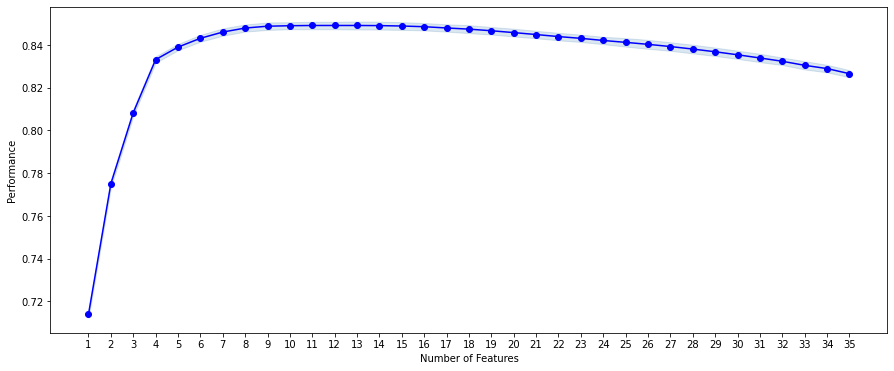

In [39]:
fig = plot_sfs(f_selector.get_metric_dict(), kind='std_err', figsize=(15,6))

In [40]:
x_data.columns.values[[1, 10, 14, 18, 19, 20, 21, 23, 25, 33]]

array(['h1n1_knowledge', 'doctor_recc_seasonal', 'health_insurance',
       'opinion_seas_vacc_effective', 'opinion_seas_risk',
       'opinion_seas_sick_from_vacc', 'age_group', 'race',
       'income_poverty', 'employment_industry'], dtype=object)